<div class="alert alert-block alert-success">
<h1>Lifting Flow over a Circular Cylinder</h1>
</div>

<p style="font-size:17px; color:black; text-align:justify">
Consider the flow synthesized by the addition of the nonlifting flow over a cylinder and a vortex of strength $\Gamma$. 
</p>

<p style="font-size:17px; color:black; text-align:justify">
The stream function for this flow: 
    $$\Psi = V_\infty y-\frac{\kappa}{2 \pi} \frac{sin\theta}{r}+\frac{\Gamma}{2 \pi} \ln r$$
</p> 

<p style="font-size:17px; color:black; text-align:justify">
The potential function for this flow: 
    $$\Phi = V_\infty x +\frac{\kappa}{2 \pi} \frac{cos\theta}{r}-\frac{\Gamma}{2 \pi} \theta$$
</p> 

<p style="font-size:17px; color:black; text-align:justify">
Below are the stream function $\psi$ and potential function $\phi$ plots (1D/2D) in the domain: $(x,y)\in[-5,5]^2$
</p> 

<p style="font-size:17px; color:red; text-align:justify">The last plot is interactive! </p> 

In [1]:
# HIDDEN
# General Purpose
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from scipy.integrate import odeint
import matplotlib.ticker as ticker
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt


# Jupyter Specifics
from IPython.display import HTML
#from ipywidgets.widgets import interact, IntSlider, FloatSlider, Layout

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider, FloatSlider, Layout


%matplotlib inline
matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

style = {'description_width': '150px'}
slider_layout = Layout(width='99%')

In [2]:
# HIDDEN
# Set range
xr = 10
xl = -xr
yu = 10
yl = -yu

# Set x, y  points
npoints = 100
x = np.linspace(xl, xr, npoints)
y = np.linspace(yl, yu, npoints)
X, Y = np.meshgrid(x, y)

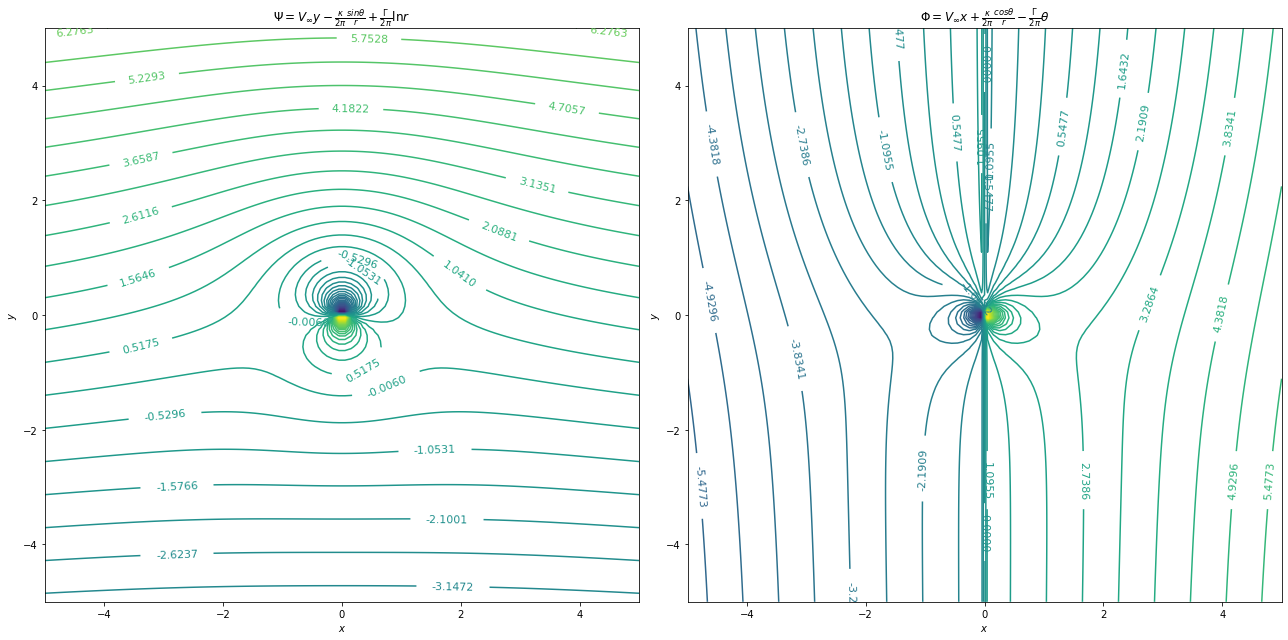

In [3]:
# HIDDEN
# Cylinder (Lifting flow)


# uniform  +  Doublet Flow
Vinf = 1

# Set range
xr = 5
xl = -xr

yu = 5
yl = -yu

npoints = 100
x = np.linspace(xl, xr, npoints)
y = np.linspace(yl, yu, npoints)

X, Y = np.meshgrid(x, y)

Kappa = 10
Gamma = 5

plt.rcParams["figure.figsize"] = (18,9)


plt.subplot(1,2,1)
Z = Vinf * Y - Y*((Kappa)/(2 * np.pi))/(np.power(X,2) + np.power(Y,2)) + (Gamma)/(2 * np.pi) * np.log( np.sqrt(np.power(X,2) + np.power(Y,2)) ) 
levels = np.linspace(np.min(Z),np.max(Z),61)
CS = plt.contour(X, Y, Z, levels=levels)
fmt='%1.4f'
plt.clabel(CS, inline=1, fontsize=11,fmt=fmt)
plt.title(r'$\Psi = V_\infty y-\frac{\kappa}{2 \pi} \frac{sin\theta}{r}+\frac{\Gamma}{2 \pi} \ln r$')
plt.xlabel('$x$')
plt.ylabel('$y$')


plt.subplot(1,2,2)
Z = Vinf * X + X*((Kappa)/(2 * np.pi))/(np.power(X,2) + np.power(Y,2)) - (Gamma)/(2 * np.pi) * np.arctan(Y/X) 
levels = np.linspace(np.min(Z),np.max(Z),61)
CS = plt.contour(X, Y, Z, levels=levels)
plt.clabel(CS, inline=1, fontsize=11, fmt=fmt)




#plt.axis('equal','box')
#plt.title('Simplest default with labels')
plt.title(r'$\Phi = V_\infty x +\frac{\kappa}{2 \pi} \frac{cos\theta}{r}-\frac{\Gamma}{2 \pi} \theta$')
plt.xlabel('$x$')
plt.ylabel('$y$')

plt.tight_layout()
plt.show()

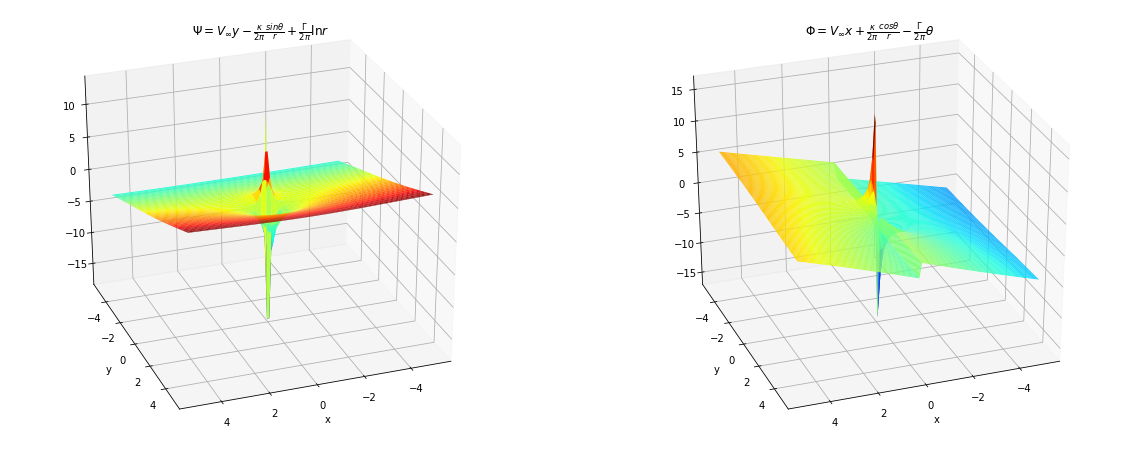

In [4]:
# HIDDEN
# Make data.
 # Set range
plt.rcParams["figure.figsize"] = (20,8)
xr = 5
xl = -xr
yu = 5
yl = -yu

# Set x, y  points
npoints = 100
x = np.linspace(xl, xr, npoints)
y = np.linspace(yl, yu, npoints)
X, Y = np.meshgrid(x, y) 

Vinf = 1
Kappa = 10
Gamma = 5
Z = Vinf * Y - Y*((Kappa)/(2 * np.pi))/(np.power(X,2) + np.power(Y,2)) + (Gamma)/(2 * np.pi) * np.log( np.sqrt(np.power(X,2) + np.power(Y,2)) ) 
Z2 = Vinf * X + X*((Kappa)/(2 * np.pi))/(np.power(X,2) + np.power(Y,2)) - (Gamma)/(2 * np.pi) * np.arctan(Y/X) 
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.jet)
plt.title(r'$\Psi = V_\infty y-\frac{\kappa}{2 \pi} \frac{sin\theta}{r}+\frac{\Gamma}{2 \pi} \ln r$')
plt.xlabel('x')
plt.ylabel('y')
ax.view_init(30, 70)

ax = fig.add_subplot(122, projection='3d')
surf = ax.plot_surface(X, Y, Z2, rstride=1, cstride=1, cmap=cm.jet)
plt.title(r'$\Phi = V_\infty x +\frac{\kappa}{2 \pi} \frac{cos\theta}{r}-\frac{\Gamma}{2 \pi} \theta$')
plt.xlabel('x')
plt.ylabel('y')
ax.view_init(30, 70)
plt.show()


In [5]:
# HIDDEN
# Cylinder (lifting flow) interactive chart

def cylinderLiftingPlot(C, C2, Kappa, Gamma):
    # Set freestream velocity
    Vinf = 1 # (units: m/s)
    fig, ax = plt.subplots(figsize=(15, 10))
    # Set range
    xr = 5
    xl = -xr
    yu = 5
    yl = -yu
       
    # Set x, y  points
    npoints = 100
    x = np.linspace(xl, xr, npoints)
    y = np.linspace(yl, yu, npoints)
    X, Y = np.meshgrid(x, y)
    
    
    Z = Vinf * Y - Y*((Kappa)/(2 * np.pi))/(np.power(X,2) + np.power(Y,2)) + (Gamma)/(2 * np.pi) * np.log( np.sqrt(np.power(X,2) + np.power(Y,2)) ) 
    CS = plt.contour(X, Y, Z, levels=[C])
    fmt='%1.5f'
    plt.clabel(CS, inline=1, fontsize=11, fmt=fmt)
    

    Z = Vinf * X + X*((Kappa)/(2 * np.pi))/(np.power(X,2) + np.power(Y,2)) - (Gamma)/(2 * np.pi) * np.arctan(Y/X)  
    CS2 = plt.contour(X, Y, Z, levels=[C2], colors='k',linestyles='dashed')
    plt.clabel(CS2, inline=1, fontsize=11, fmt=fmt)
    
#     plt.title(r'$\Psi = V_\infty y -\frac{\kappa}{2 \pi} \frac{sin\theta}{r}+\frac{\Gamma}{2 \pi} \ln r$   and   $\Phi = V_\infty x +\frac{\kappa}{2 \pi} \frac{cos\theta}{r}-\frac{\Gamma}{2 \pi} \theta$')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.tight_layout()
    plt.show()

In [6]:
# HIDDEN
interactive_plot = interactive(cylinderLiftingPlot, 
                               C=widgets.FloatSlider(value=0,min=-5,max=5,step=0.1,description=r'$\Psi = V_\infty y -\frac{\kappa}{2 \pi} \frac{sin\theta}{r}+\frac{\Gamma}{2 \pi} \ln r$', style=style, layout=slider_layout), 
                               C2=widgets.FloatSlider(value=-3,min=-5,max=5,step=0.1,description=r'$\Phi = V_\infty x +\frac{\kappa}{2 \pi} \frac{cos\theta}{r}-\frac{\Gamma}{2 \pi} \theta$', style=style, layout=slider_layout), 
                               Kappa=widgets.FloatSlider(value=32,min=0,max=60,step=2,description=r'$\kappa$', style=style, layout=slider_layout), 
                               Gamma=widgets.FloatSlider(value=1,min=0,max=30,step=1,description=r'$\Gamma$', style=style, layout=slider_layout));

interactive_plot.children[0].readout_format = '.4f'
interactive_plot.children[1].readout_format = '.4f'
interactive_plot.children[2].readout_format = '.4f'
interactive_plot.children[3].readout_format = '.4f'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='$\\Psi = V_\\infty y -\\frac{\\kappa}{2 \\pi} \\frac…